In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
%matplotlib inline

In [3]:
np.random.seed()

In [4]:
# Exploratory data analysis

In [5]:
data = pd.read_csv('./cardio_data.csv', sep=';', index_col='id')

In [6]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [8]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
data['age'] = data['age'] // 365

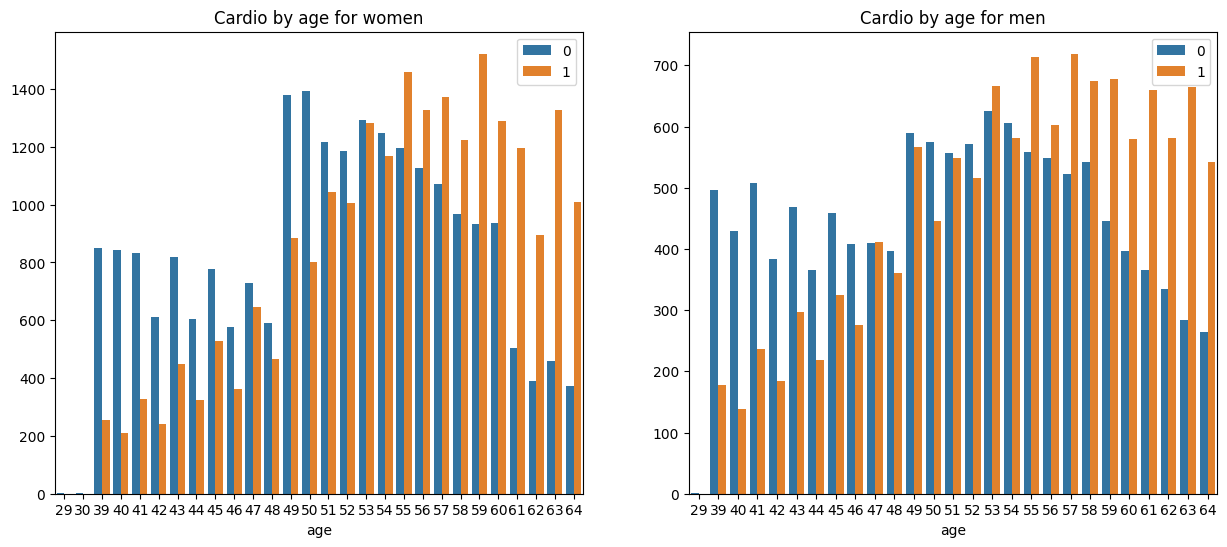

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax_1 = sns.countplot(x='age', hue='cardio', data=data[data.gender==1], ax=axes[0])
ax_2 = sns.countplot(x='age', hue='cardio', data=data[data.gender==2], ax=axes[1])

ax_1.set_title('Cardio by age for women')
ax_2.set_title('Cardio by age for men')
ax_1.set(xlabel='age', ylabel=None)
ax_2.set(xlabel='age', ylabel=None)
ax_1.legend(loc=0)
ax_2.legend(loc=0)

In [11]:
data.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,51.231261,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,54.452014,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [12]:
data.loc[(data.age < 45), 'age_group'] = 'young'
data.loc[(data.age >= 45) & (data.age < 60), 'age_group'] = 'middle'
data.loc[(data.age >= 60), 'age_group'] = 'elderly'

<AxesSubplot: title={'center': 'Distribution by age groups'}, ylabel='age_group'>

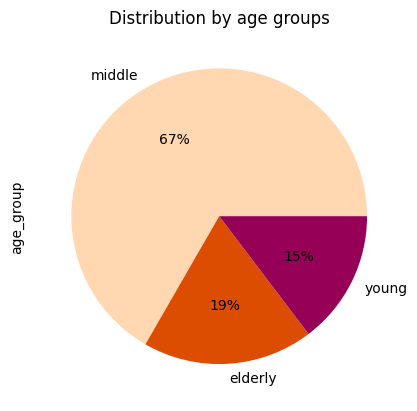

In [13]:
pie_data = data['age_group'].value_counts()
pie_data.plot(
    kind='pie', title='Distribution by age groups',
    autopct='%1.0f%%', y='age_group', colors = ['#ffd8b1', '#dc4d01', '#960056']
)

<AxesSubplot: >

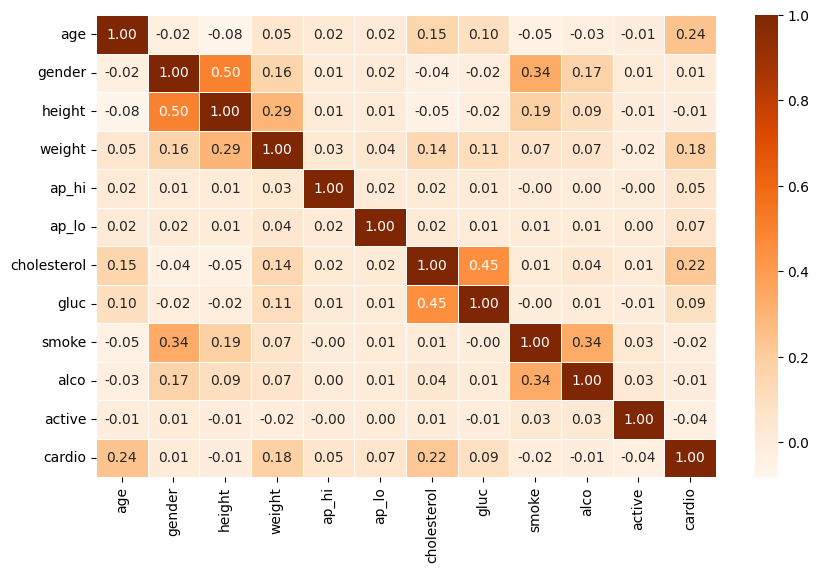

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    data.corr(numeric_only=True), annot=True,
    linewidth=.5, cmap='Oranges', fmt='.2f'
)

In [15]:
# Train test split

In [16]:
X = data.drop(['cardio', 'age_group'], axis=1).values
y = data['cardio'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Creating the model

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = RandomForestClassifier(n_estimators=300)

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [23]:
# Evaluating the model performance

In [24]:
predictions = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(confusion_matrix, end='\n')
classification_report = classification_report(y_test, predictions)
print('Classification Report: ')
print(classification_report, end='\n')

Accuracy: 0.7082
Confusion Matrix: 
[[4955 2038]
 [2047 4960]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6993
           1       0.71      0.71      0.71      7007

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [26]:
pickle.dump(model, open('models/model.pkl', 'wb'))